In [14]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec

In [2]:
num_task=10
epochs=20

def get_mean_acc(acc,epochs):
    num_task=len(acc)
    temp=np.zeros((num_task,len(acc[0])))
    for t,v in acc.items():
        temp[t,range(t * epochs, num_task * epochs)]=v
        if t<num_task-1:
            temp[t+1,:]=temp[:t+1,:].mean(0)
    return temp.mean(0)

def get_mean_acc_on_iterations(acc_list):
    acc = {}
    for i in acc_list[0].keys():
        acc[i] = np.zeros(len(acc_list[0][i]))
    for t in range(len(acc_list)):
        for i in acc_list[0].keys():
            acc[i] += np.array(acc_list[t][i]) / len(acc_list)
    return acc

In [3]:
acc_mas_list = [[] for i in range(8)]
acc_sketch_mas_list = [[] for i in range(5)]
for i in range(5):
    path_MAS = '.\\perm_mnist_10Run\\experiment_MAS_id_%d.pkl'%(i)
    path_SketchMAS = '.\\perm_mnist_10Run\\experiment_SketchMAS_id_%d.pkl'%(i)
    with open(path_MAS, 'rb') as f:
        _, acc_mas, hyperparameter_mas = pickle.load(f)
        for j in range(8):
            acc_mas_list[j].append(acc_mas[j])
    with open(path_SketchMAS, 'rb') as f:
        _, acc_sketch_mas, hyperparameter_sketch_mas = pickle.load(f)
        for j in range(5):
            acc_sketch_mas_list[j].append(acc_sketch_mas[j])

In [4]:
for j in range(8):
    acc_mas_list[j] = get_mean_acc_on_iterations(acc_mas_list[j])
for j in range(5):
    acc_sketch_mas_list[j] = get_mean_acc_on_iterations(acc_sketch_mas_list[j])

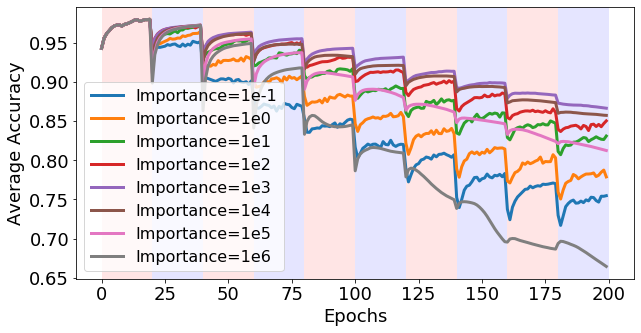

In [32]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(8):
    plt.plot(get_mean_acc(acc_mas_list[i],epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Importance=1e-1', 'Importance=1e0', 'Importance=1e1', 'Importance=1e2', 'Importance=1e3', 'Importance=1e4', 'Importance=1e5', 'Importance=1e6'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig('figure/grid_search_sketch_mas_compare.svg',format='svg')
plt.show()

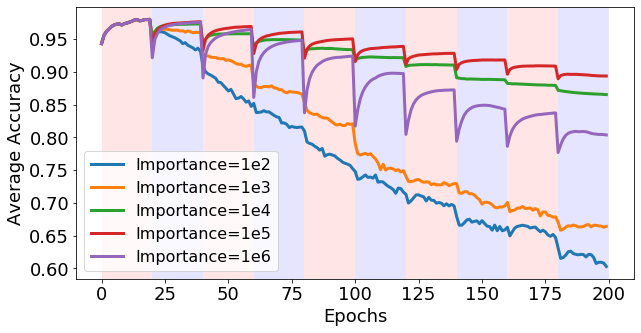

In [35]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
for i in range(5):
    plt.plot(get_mean_acc(acc_sketch_mas_list[i],epochs),linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Importance=1e2', 'Importance=1e3', 'Importance=1e4', 'Importance=1e5', 'Importance=1e6'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig('figure/grid_search_sketch_mas_50_sketches.svg',format='svg')
plt.show()

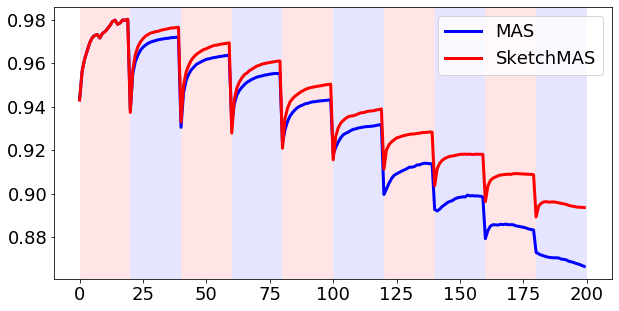

In [34]:
acc_mas = acc_mas_list[4]
acc_sketch_mas = acc_sketch_mas_list[3]

plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
plt.plot(get_mean_acc(acc_mas,epochs),'b',linewidth=3)
plt.plot(get_mean_acc(acc_sketch_mas,epochs),'r',linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['MAS','SketchMAS'],fontsize=18)
plt.savefig('figure/grid_search_sketch_mas_compare.svg',format='svg')
plt.show()


In [8]:
acc_sketch_mas_buckets_list = [[] for i in range(5)]
for i in range(5):
    path_SketchMAS_buckets = '.\\perm_mnist_10Run\\experiment_SketchMAS_id_%d_bucket_10-50.pkl'%(i)
    with open(path_SketchMAS_buckets, 'rb') as f:
        _, acc_sketch_mas_buckets, hyperparameter_sketch_mas_buckets = pickle.load(f)
        for j in range(5):
            acc_sketch_mas_buckets_list[j].append(acc_sketch_mas_buckets[j])

In [9]:
for j in range(5):
    acc_sketch_mas_buckets_list[j] = get_mean_acc_on_iterations(acc_sketch_mas_buckets_list[j])

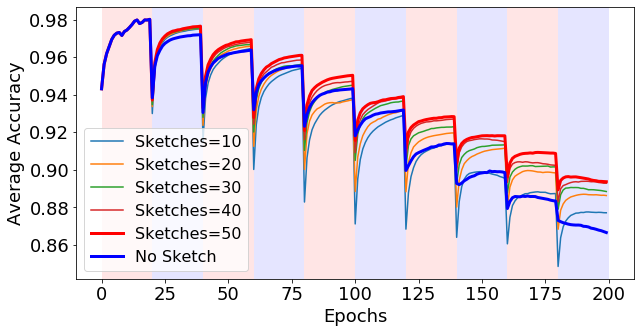

In [38]:
plt.figure(figsize=(10,5))
for t in range(num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t*epochs, (t+1)*epochs, facecolor=c, alpha=0.1)
    
for i in range(4):
    plt.plot(get_mean_acc(acc_sketch_mas_buckets_list[i],epochs),linewidth=1.5)
plt.plot(get_mean_acc(acc_sketch_mas_buckets_list[4],epochs),'r',linewidth=3)
plt.plot(get_mean_acc(acc_mas,epochs),'b',linewidth=3)

plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.legend(['Sketches=10', 'Sketches=20', 'Sketches=30', 'Sketches=40', 'Sketches=50', 'No Sketch'],fontsize=16)
plt.xlabel('Epochs',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_mas_sketches_search.svg',format='svg')
plt.show()

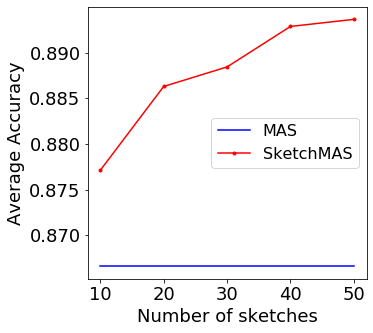

In [42]:
plt.figure(figsize=(5,5))

plt.plot([10,50], [get_mean_acc(acc_mas,epochs)[-1] for i in range(2)], 'b-')
plt.plot([10,20,30,40,50], [get_mean_acc(acc_sketch_mas_buckets_list[i],epochs)[-1] for i in range(5)], 'r.-')
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
plt.locator_params(axis='x', nbins=5)
plt.legend(['MAS', 'SketchMAS'],fontsize=16)
plt.xlabel('Number of sketches',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_mas_sketches_search_2.svg',format='svg')
plt.show()

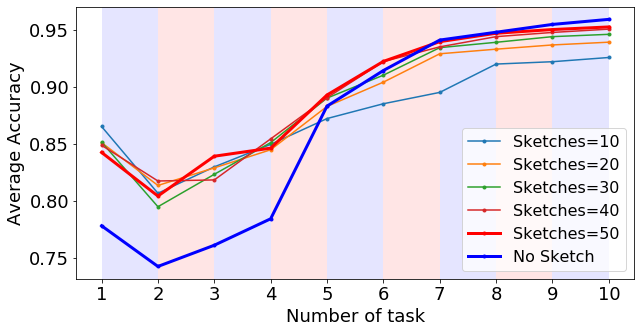

In [43]:
plt.figure(figsize=(10,5))
for t in range(1,num_task):
    if t%2:
        c='b'
    else:
        c='r'
    plt.axvspan(t, t+1, facecolor=c, alpha=0.1)
for i in range(4):
    plt.plot(np.arange(10)+1,[acc_sketch_mas_buckets_list[i][j][-1] for j in range(10)],'.-')
plt.plot(np.arange(10)+1,[acc_sketch_mas_buckets_list[4][j][-1] for j in range(10)],'r.-',linewidth=3)
plt.plot(np.arange(10)+1,[acc_mas[j][-1] for j in range(10)],'b.-',linewidth=3)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
# plt.ylim(0.7,1)
plt.locator_params(axis='x', nbins=10)
plt.legend(['Sketches=10', 'Sketches=20', 'Sketches=30', 'Sketches=40', 'Sketches=50', 'No Sketch'],fontsize=16)
plt.xlabel('Number of task',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)
plt.savefig('figure/grid_search_sketch_mas_task_compare_1.svg',format='svg')
plt.show()

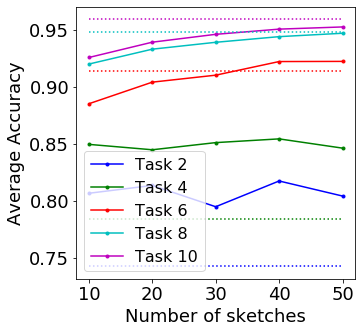

In [46]:
plt.figure(figsize=(5,5))

plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][1][-1] for i in range(5)],'b.-')
plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][3][-1] for i in range(5)],'g.-')
plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][5][-1] for i in range(5)],'r.-')
plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][7][-1] for i in range(5)],'c.-')
plt.plot([10,20,30,40,50],[acc_sketch_mas_buckets_list[i][9][-1] for i in range(5)],'m.-')
plt.plot([10,50], [acc_mas[1][-1]for i in range(2)], 'b:', label=None)
plt.plot([10,50], [acc_mas[3][-1]for i in range(2)], 'g:', label=None)
plt.plot([10,50], [acc_mas[5][-1]for i in range(2)], 'r:', label=None)
plt.plot([10,50], [acc_mas[7][-1]for i in range(2)], 'c:', label=None)
plt.plot([10,50], [acc_mas[9][-1]for i in range(2)], 'm:', label=None)
plt.xticks(fontsize=18),plt.yticks(fontsize=18)
# plt.ylim(0.7,1)
plt.locator_params(axis='x', nbins=5)
plt.legend(['Task 2','Task 4','Task 6','Task 8','Task 10'],fontsize=16, loc='lower left')
plt.xlabel('Number of sketches',fontsize=18),plt.ylabel('Average Accuracy',fontsize=18)

plt.savefig('figure/grid_search_sketch_mas_task_compare_2.svg',format='svg')
plt.show()